In [13]:
import pandas as pd

# Load data
df = pd.read_csv("D:\\DataSets\\Chocolate_Sales.csv")

# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB
None
     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1          

In [15]:
#clean the amount coloumn: remove '$' and convert to numeric
df["Amount"] = df["Amount"].replace("[$,]", "", regex=True).astype(float)

#Convert Data column to datetimeformat
df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%y")

#convert for missing values and duplicates
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()

#Display updated info and check missing/duplicate values
df.info(), missing_values, duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 51.4+ KB


(None,
 Sales Person     0
 Country          0
 Product          0
 Date             0
 Amount           0
 Boxes Shipped    0
 dtype: int64,
 0)

In [17]:
# aggregate total sales and total boxes shipped per product
product_sales = df.groupby("Product").agg(
    Total_Sales=("Amount", "sum"),
    Total_Boxes_Shipped=("Boxes Shipped", "sum")
).sort_values(by="Total_Sales", ascending=False)

# Display top 5 best selling products
product_sales.head()

,Total_Sales,Total_Boxes_Shipped
Product,,
Smooth Sliky Salty,349692.0,8810
50% Dark Bites,341712.0,9792
White Choc,329147.0,8240
Peanut Butter Cubes,324842.0,8304
Eclairs,312445.0,8757


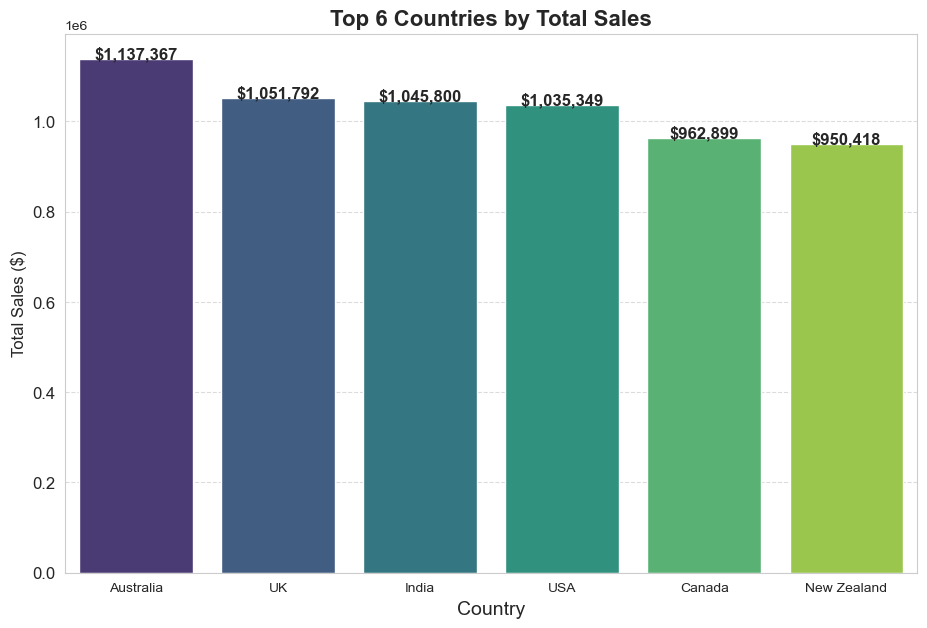

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

#Group by country and sum total sales
country_sales = df.groupby("Country")["Amount"].sum().sort_values(ascending=False).head(10)

#Plot top selling countries
plt.figure(figsize=(11,7))
sns.barplot(x=country_sales.index, y=country_sales.values, hue=country_sales.index, palette="viridis", legend=False)

#add annonations
for i, value in enumerate(country_sales.values):
    plt.text(i, value + 1000, f"${value:,.0f}", ha='center', fontsize=12, fontweight="bold")
    
plt.title("Top 6 Countries by Total Sales", fontsize=16, fontweight="bold")
plt.xlabel("Country", fontsize=14)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

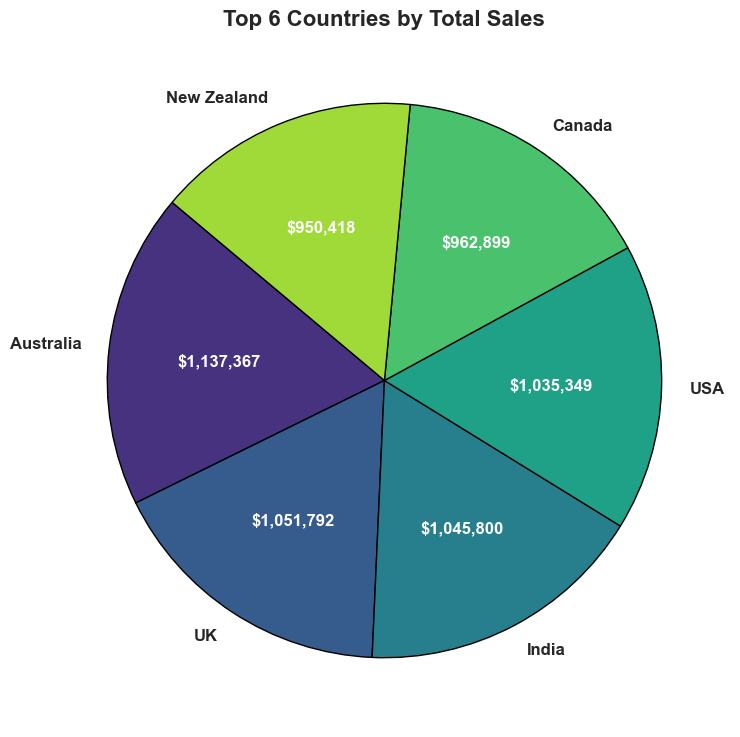

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by country and sum total sales
country_sales = df.groupby("Country")["Amount"].sum().sort_values(ascending=False).head(10)

# 🎨 Define color palette
colors = sns.color_palette("viridis", len(country_sales))

# 📊 **Create Pie Chart with Sales Amount**
plt.figure(figsize=(9, 9))
wedges, texts, autotexts = plt.pie(
    country_sales, 
    labels=country_sales.index, 
    autopct=lambda p: f"${p * sum(country_sales) / 100:,.0f}",  # Convert percentage to sales amount
    colors=colors, 
    startangle=140, 
    wedgeprops={"edgecolor": "black", "linewidth": 1},
    textprops={"fontsize": 12, "fontweight": "bold"}  # Improve text readability
)

# 🎨 Customize text colors for better visibility
for autotext in autotexts:
    autotext.set_color("white")

plt.title("Top 6 Countries by Total Sales", fontsize=16, fontweight="bold")
plt.show()


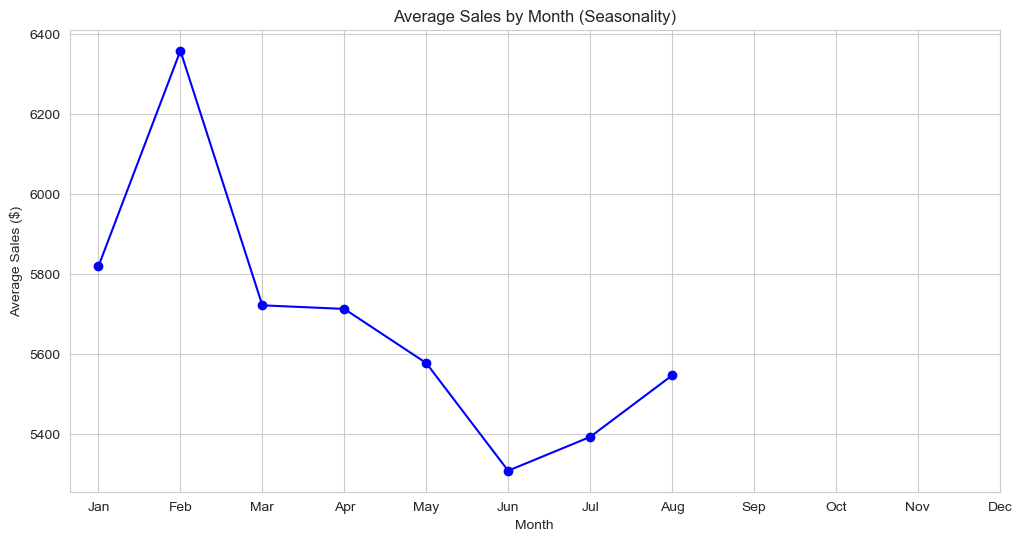

In [21]:
# Extract Month and Year for grouping
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

# Group sales by Month across all years
monthly_avg_sales = df.groupby("Month")["Amount"].mean()

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
monthly_avg_sales.plot(marker="o", linestyle="-", color="blue")
plt.title("Average Sales by Month (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Average Sales ($)")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.show()


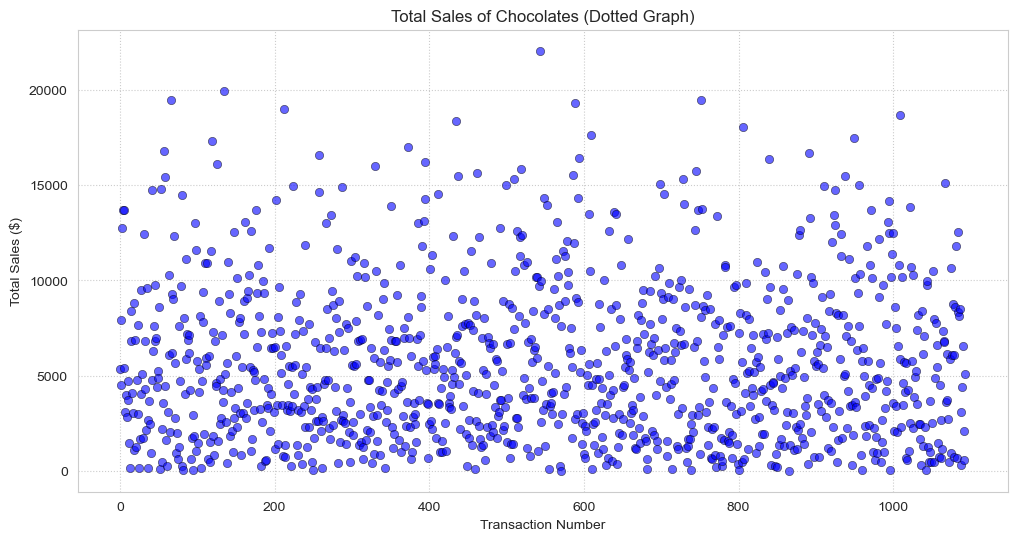

In [29]:
# ---- 🍫 5. Dotted Graph for Total Chocolate Sales ----
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x=df.index, y="Amount", color="blue", alpha=0.6, edgecolor="black", marker="o")
plt.title("Total Sales of Chocolates (Dotted Graph)")
plt.xlabel("Transaction Number")
plt.ylabel("Total Sales ($)")
plt.grid(True, linestyle="dotted")
plt.show()

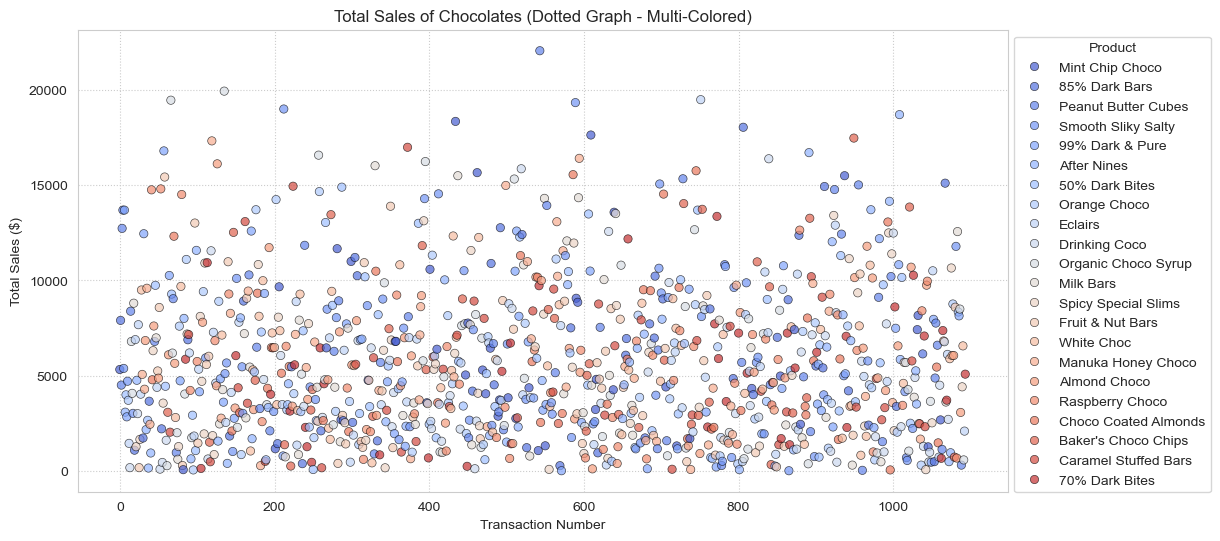

In [33]:
# ---- 🍫 5. Dotted Graph for Total Chocolate Sales (Multi-Colored) ----
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x=df.index, y="Amount", hue="Product", palette="coolwarm", alpha=0.7, edgecolor="black", marker="o")
plt.title("Total Sales of Chocolates (Dotted Graph - Multi-Colored)")
plt.xlabel("Transaction Number")
plt.ylabel("Total Sales ($)")
plt.legend(title="Product", bbox_to_anchor=(1, 1))  # Move legend outside
plt.grid(True, linestyle="dotted")
plt.show()


Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped',
       'Year', 'Month'],
      dtype='object')


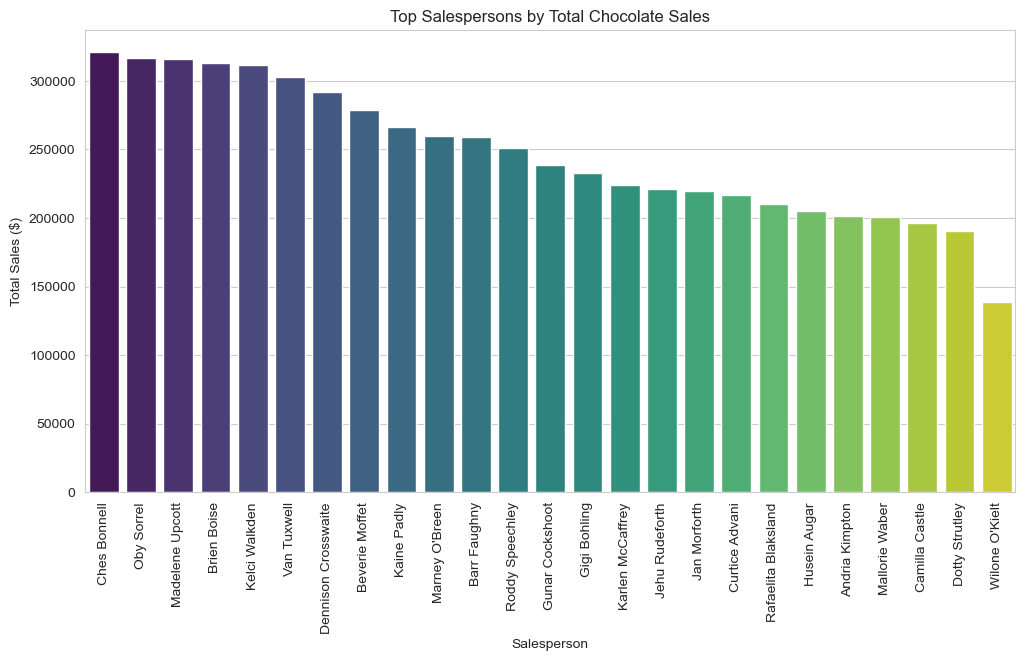

🥇 Top Salesperson: Ches Bonnell with $320,901.00 in sales!


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check column names
print(df.columns)  # Uncomment if you need to check actual column names

# Define the salesperson column name
salesperson_column = "Sales Person"  # Change this if needed

# Ensure the column exists
if salesperson_column in df.columns:
    # Group by Salesperson and sum the total sales amount
    top_salespersons = df.groupby(salesperson_column)["Amount"].sum().sort_values(ascending=False).reset_index()

    # Plot the top salespersons
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_salespersons, x=salesperson_column, y="Amount", hue=salesperson_column, dodge=False, palette="viridis")
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.title("Top Salespersons by Total Chocolate Sales")
    plt.xlabel("Salesperson")
    plt.ylabel("Total Sales ($)")
    plt.legend([], [], frameon=False)  # Hide legend
    plt.show()
    
    # Display the top salesperson
    print(f"🥇 Top Salesperson: {top_salespersons.iloc[0, 0]} with ${top_salespersons.iloc[0, 1]:,.2f} in sales!")

else:
    print(f"Column '{salesperson_column}' not found in the dataset. Please check column names.")


Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped',
       'Year', 'Month', 'Month_Year'],
      dtype='object')


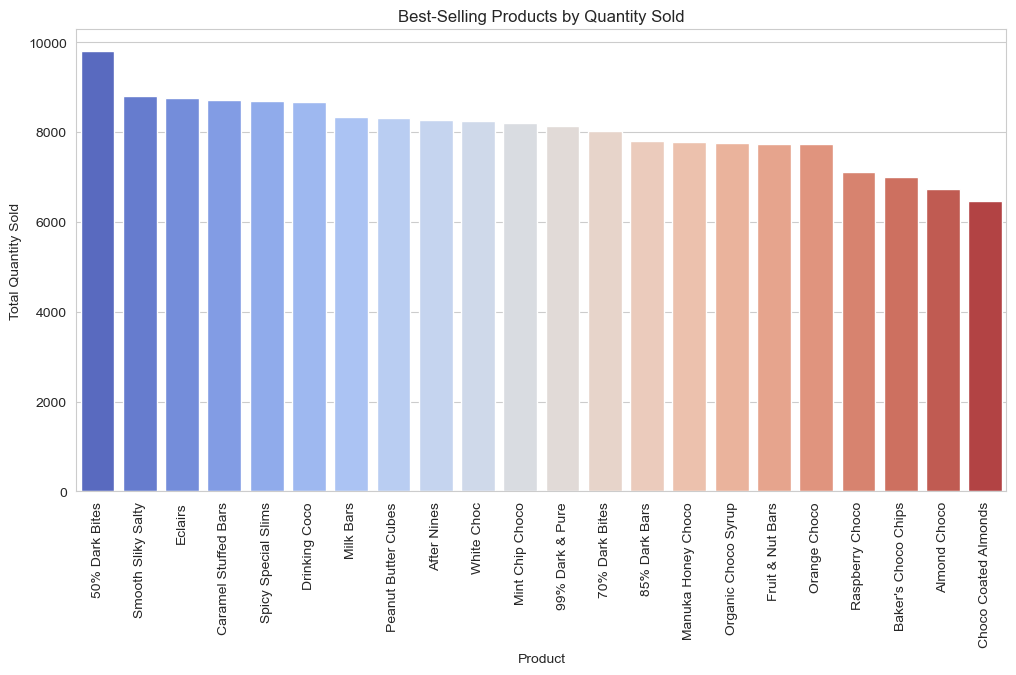

🥇 **Best-Selling Product by Revenue:** Smooth Sliky Salty with $349,692.00 in sales!
🥇 **Best-Selling Product by Quantity:** 50% Dark Bites with 9,792 units sold!


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check column names
print(df.columns)  # Uncomment if needed to check actual column names

# Define the product and quantity column names
product_column = "Product"  # Change this if needed
quantity_column = "Boxes Shipped"  # Change this if needed

# Ensure the columns exist
if product_column in df.columns and quantity_column in df.columns:
    #Best-Selling Product by Quantity
    best_selling_quantity = df.groupby(product_column)[quantity_column].sum().sort_values(ascending=False).reset_index()
    
    # 🏆 **Best Selling Product by Quantity Sold** (Bar Plot)
    plt.figure(figsize=(12, 6))
    sns.barplot(data=best_selling_quantity, x=product_column, y=quantity_column, hue=product_column, dodge=False, palette="coolwarm")
    plt.xticks(rotation=90)
    plt.title("Best-Selling Products by Quantity Sold")
    plt.xlabel("Product")
    plt.ylabel("Total Quantity Sold")
    plt.legend([], [], frameon=False)  # Hide legend
    plt.show()

    # Print best-selling product details
    print(f"🥇 **Best-Selling Product by Revenue:** {best_selling_revenue.iloc[0, 0]} with ${best_selling_revenue.iloc[0, 1]:,.2f} in sales!")
    print(f"🥇 **Best-Selling Product by Quantity:** {best_selling_quantity.iloc[0, 0]} with {best_selling_quantity.iloc[0, 1]:,} units sold!")

else:
    print(f"Columns '{product_column}' or '{quantity_column}' not found in the dataset. Please check column names.")


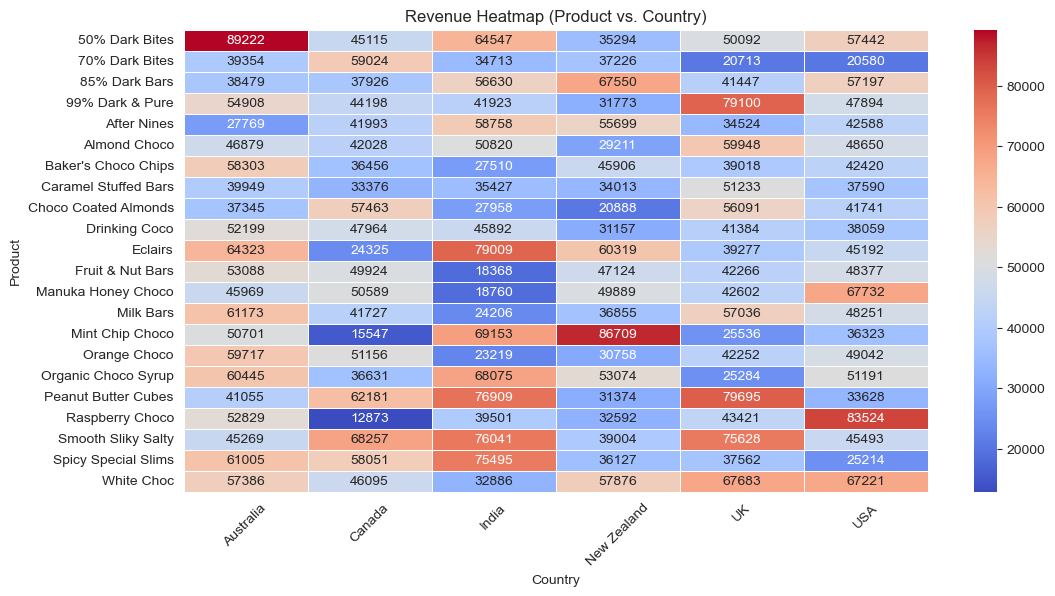

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure columns exist
product_column = "Product"  # Change if needed
country_column = "Country"  # Change if needed
revenue_column = "Amount"  # Change if needed

if product_column in df.columns and country_column in df.columns and revenue_column in df.columns:
    
    # Create pivot table for heatmap
    revenue_pivot = df.pivot_table(index=product_column, columns=country_column, values=revenue_column, aggfunc="sum").fillna(0)

    # Create heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(id = "sales-heatmap " , revenue_pivot, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
    plt.title("Revenue Heatmap (Product vs. Country)")
    plt.xlabel("Country")
    plt.ylabel("Product")
    plt.xticks(rotation=45)
    plt.show()

else:
    print(f" Columns '{product_column}', '{country_column}', or '{revenue_column}' not found in the dataset. Please check column names.")


🔝 **Top-Selling Chocolate Type in Each Country:**
         Country              Product   Amount
0      Australia       50% Dark Bites  89222.0
41        Canada   Smooth Sliky Salty  68257.0
54         India              Eclairs  79009.0
80   New Zealand      Mint Chip Choco  86709.0
105           UK  Peanut Butter Cubes  79695.0
128          USA      Raspberry Choco  83524.0


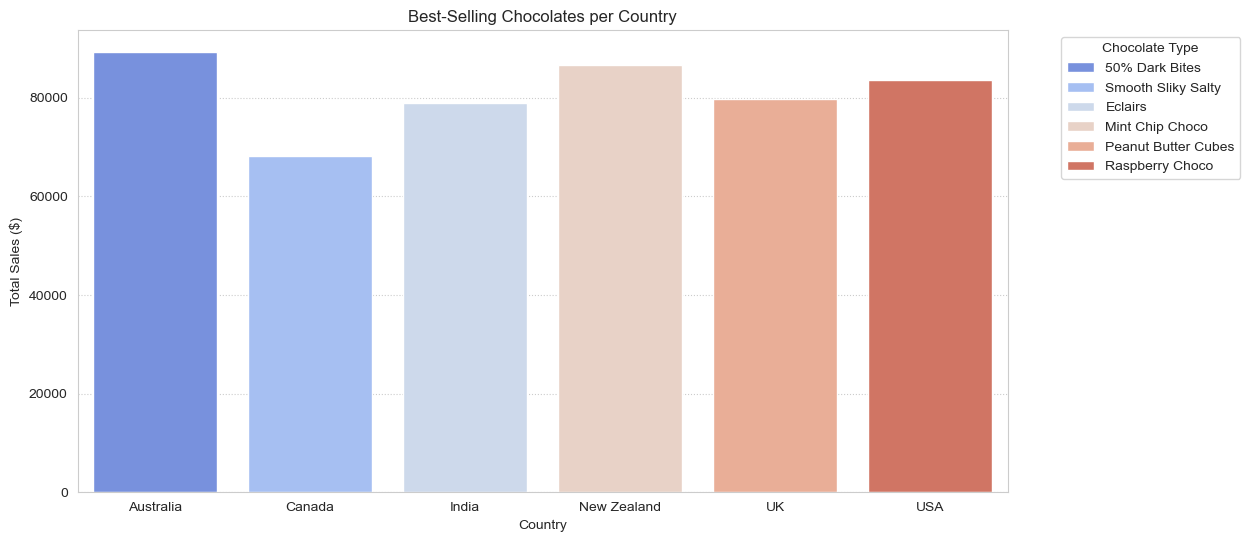

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Date column is in datetime format (if not already)
df["Date"] = pd.to_datetime(df["Date"])

# Group data by Country and Product Category
country_choco_sales = df.groupby(["Country", "Product"])["Amount"].sum().reset_index()

# Find the top-selling product for each country
top_choco_per_country = country_choco_sales.loc[country_choco_sales.groupby("Country")["Amount"].idxmax()]

# 🔹 Print the top-selling chocolate type for each country
print("🔝 **Top-Selling Chocolate Type in Each Country:**")
print(top_choco_per_country)

# 📊 **Visualizing Best-Selling Chocolates per Country**
plt.figure(figsize=(12, 6))
sns.barplot( id = " best-selling-chocolate " , data=top_choco_per_country, x="Country", y="Amount", hue="Product", palette="coolwarm")

plt.title("Best-Selling Chocolates per Country")
plt.xlabel("Country")
plt.ylabel("Total Sales ($)")
#plt.xticks(rotation=45)
plt.legend(title="Chocolate Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="dotted")
plt.show()
